In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d blastchar/telco-customer-churn

Saving kaggle.json to kaggle.json
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 68.9MB/s]


In [2]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#creating a dataframe for the dataset and check the dataframe structure
import os
os.rename('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv', '/content/customer-churn.csv')
df = pd.read_csv('customer-churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#viewing the dataframe and its data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
#converting Total charges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df['Churn'] = pd.get_dummies(df['Churn'], drop_first = True)
df.info()
df.to_csv('churn-data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#To view the summary statistic of our data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [9]:
df.drop(['customerID'], inplace = True, axis = 1)
for s in df.columns:
  print("{}\t{}".format(s,df[s].unique()))

gender	['Female' 'Male']
SeniorCitizen	[0 1]
Partner	['Yes' 'No']
Dependents	['No' 'Yes']
tenure	[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService	['No' 'Yes']
MultipleLines	['No phone service' 'No' 'Yes']
InternetService	['DSL' 'Fiber optic' 'No']
OnlineSecurity	['No' 'Yes' 'No internet service']
OnlineBackup	['Yes' 'No' 'No internet service']
DeviceProtection	['No' 'Yes' 'No internet service']
TechSupport	['No' 'Yes' 'No internet service']
StreamingTV	['No' 'Yes' 'No internet service']
StreamingMovies	['No' 'Yes' 'No internet service']
Contract	['Month-to-month' 'One year' 'Two year']
PaperlessBilling	['Yes' 'No']
PaymentMethod	['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges	[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges	[  29.85 1889.

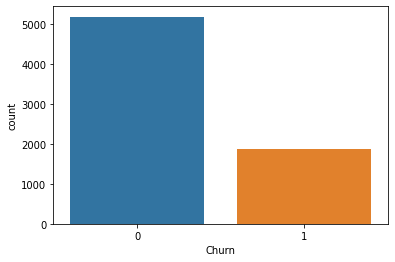

In [10]:
#To view total customers based on churn column
sns.countplot(x = 'Churn', data = df)

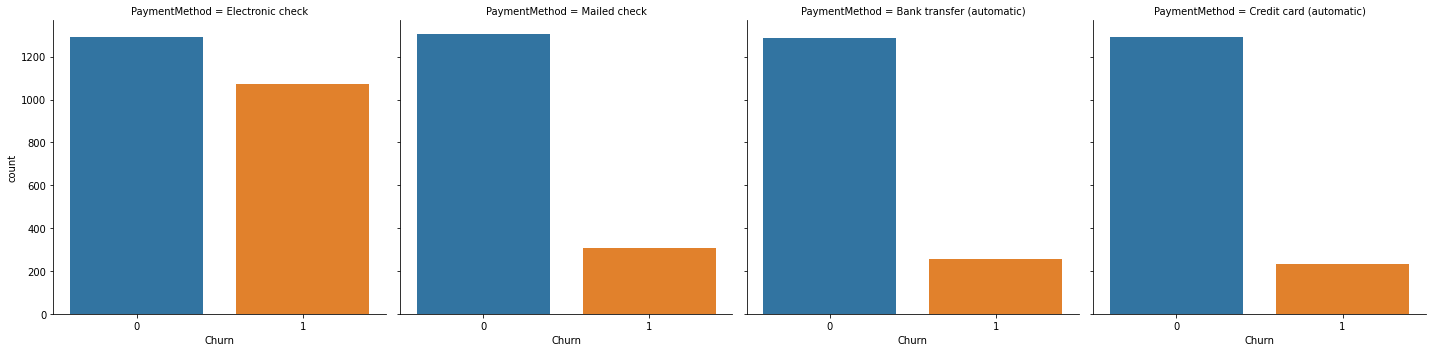

In [11]:
sns.catplot(x = 'Churn', col = 'PaymentMethod', data= df, kind='count')

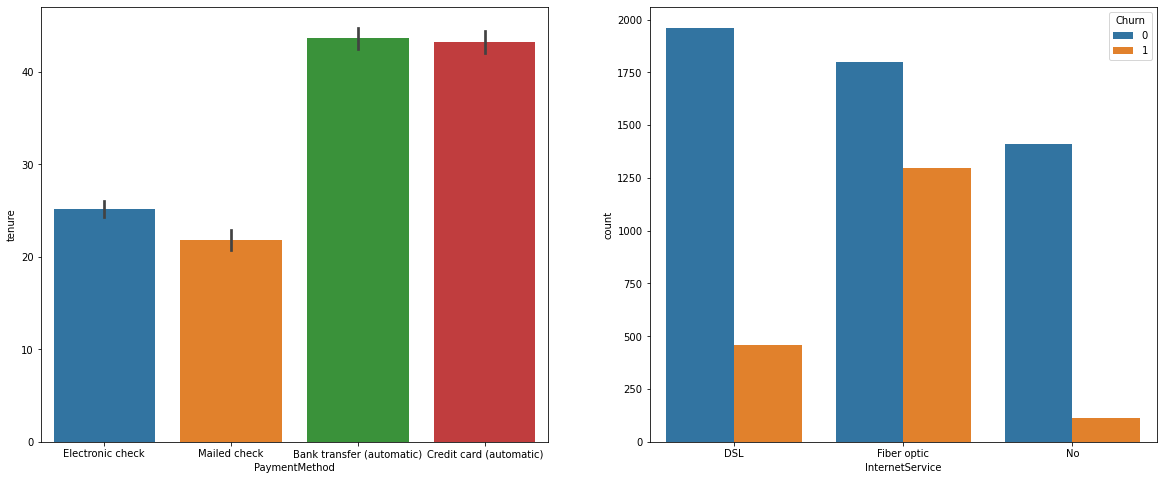

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y = 'tenure', x = 'PaymentMethod', data = df, ax = ax1)
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)

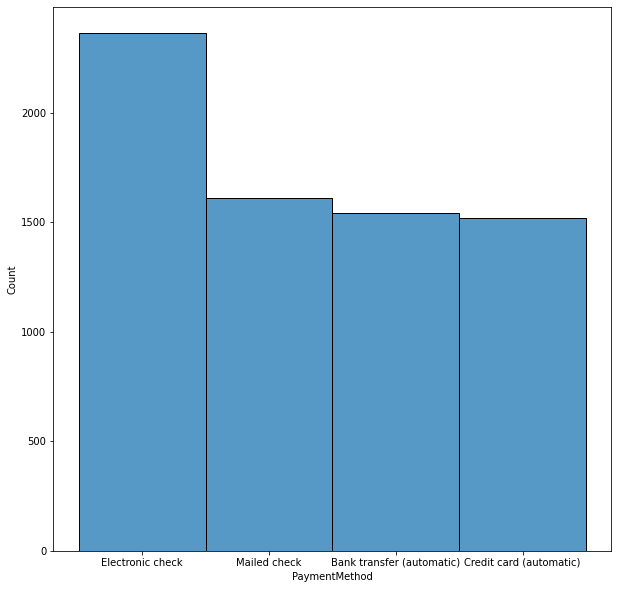

In [13]:
plt.figure(figsize = (10,10))
sns.histplot(x = 'PaymentMethod', data = df)

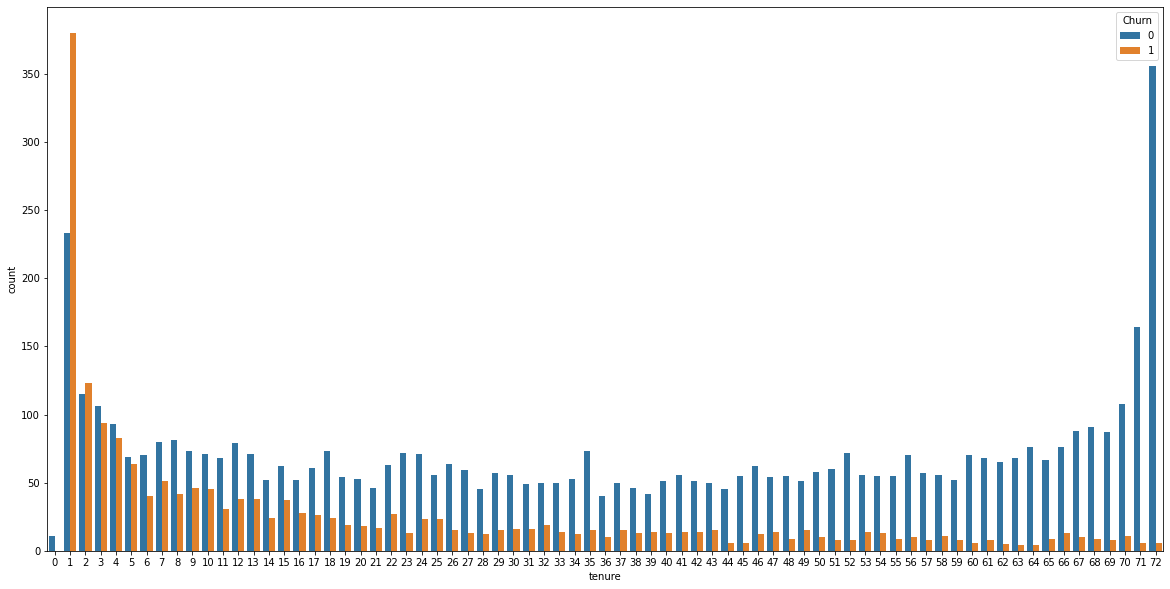

In [14]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'tenure', hue = 'Churn', data = df)
#we can see that customer with high tenure are less likely to churn where as those with low tenure would want to churn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


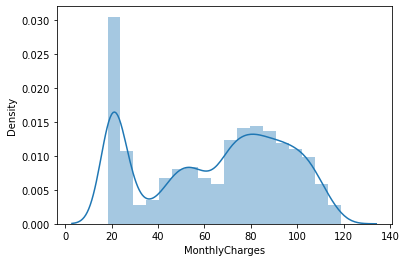

In [15]:
sns.distplot(df['MonthlyCharges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


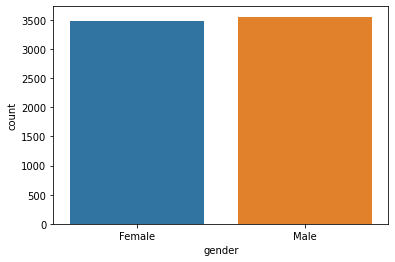

In [16]:
sns.countplot('gender', data = df)
#male and female are equally distributed in the data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


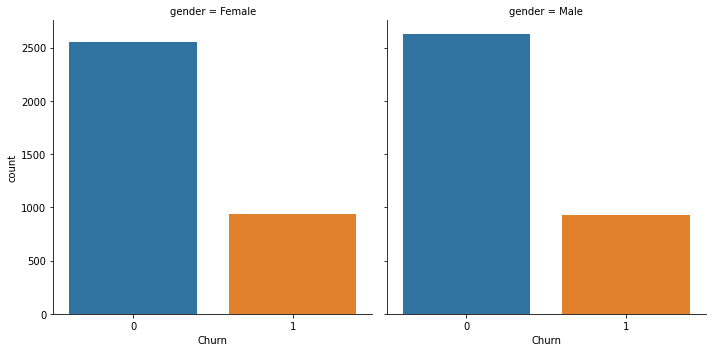

In [17]:
sns.catplot('Churn', col = 'gender', data = df, kind = 'count')

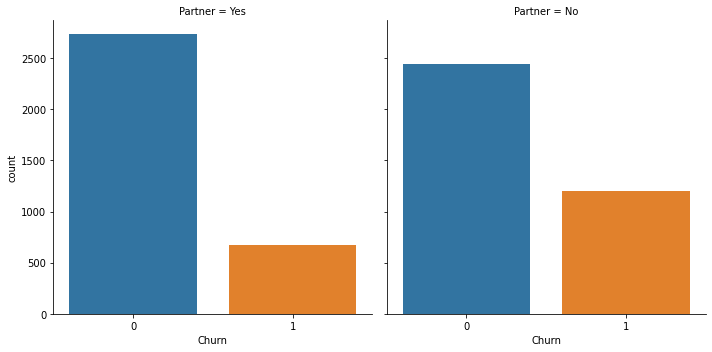

In [18]:
sns.catplot(x = 'Churn' , col = 'Partner', data = df, kind = 'count')
#customer with no partner have a slightly high churning rate

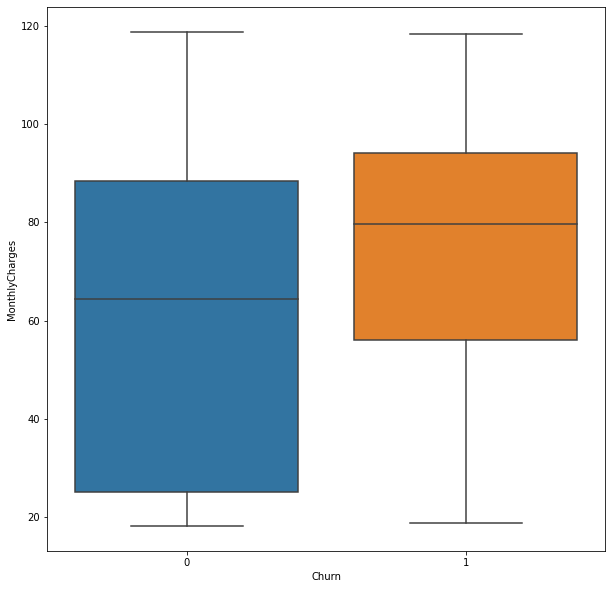

In [19]:
plt.figure(figsize = (10, 10))
sns.boxplot(y = 'MonthlyCharges', x = 'Churn', data = df)

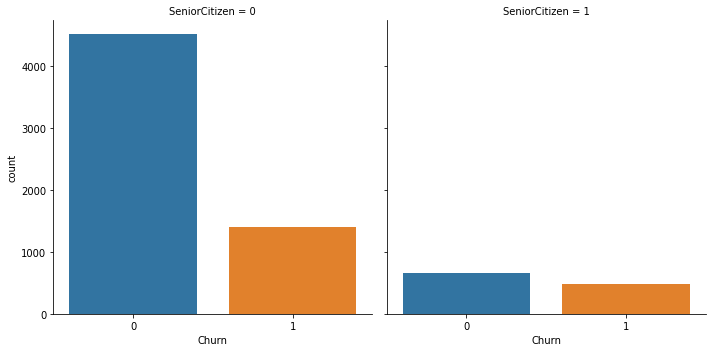

In [20]:
sns.catplot(x = 'Churn', col = 'SeniorCitizen', data = df, kind = 'count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


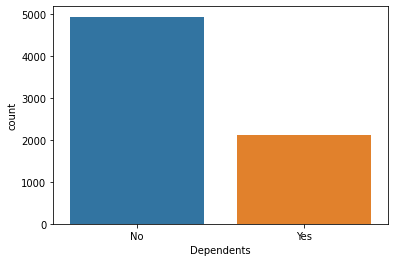

In [21]:
sns.countplot('Dependents', data = df)

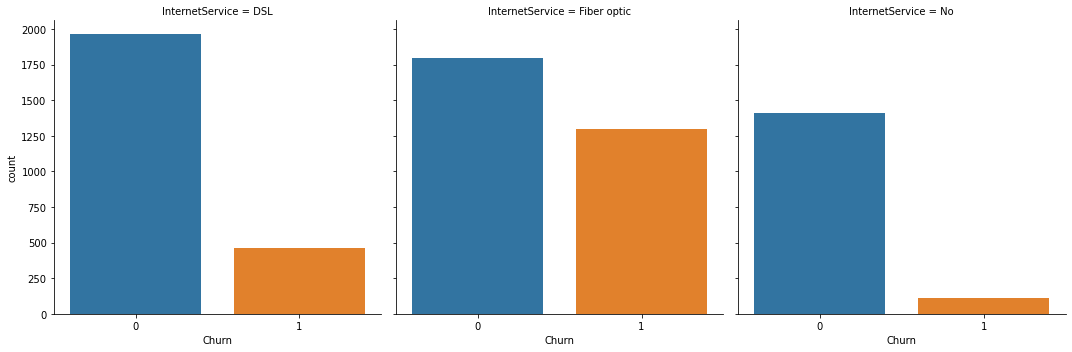

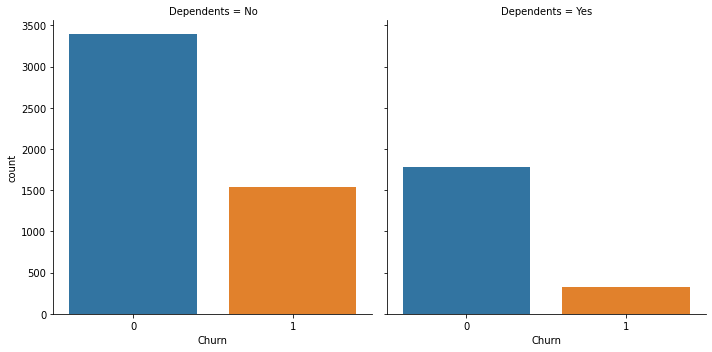

In [22]:
sns.catplot(x = 'Churn', col = 'InternetService', data = df, kind = 'count')
#customer with fiber optic internet service left more
sns.catplot(x = 'Churn', col = 'Dependents', data = df, kind = 'count')
#customers with dependents are less likely to churn

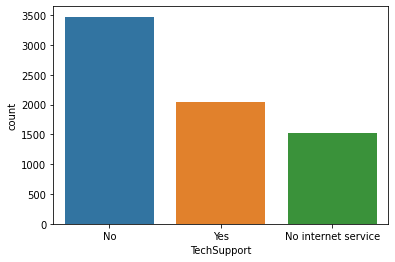

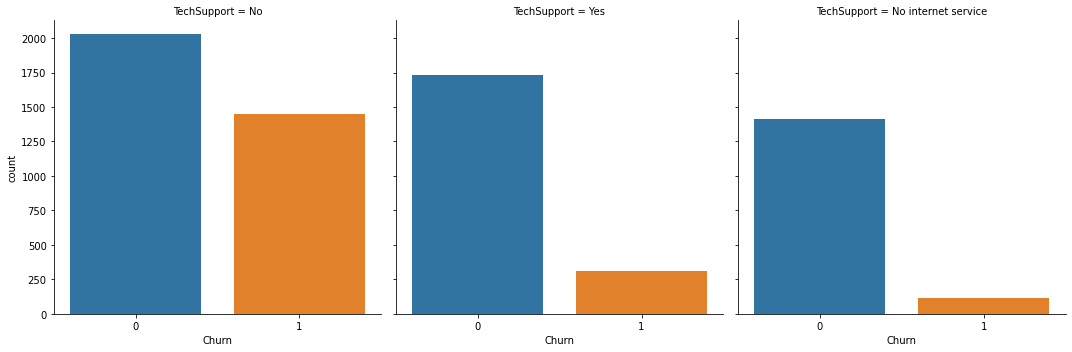

In [23]:
sns.countplot(x = 'TechSupport', data = df)
sns.catplot(x = 'Churn', col = 'TechSupport', data = df, kind = 'count')
#customers with tech support are less likely to churn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


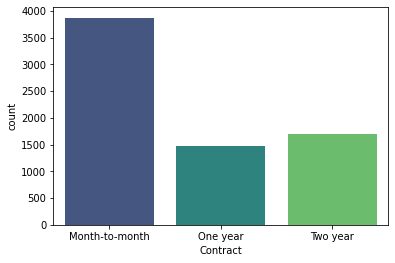

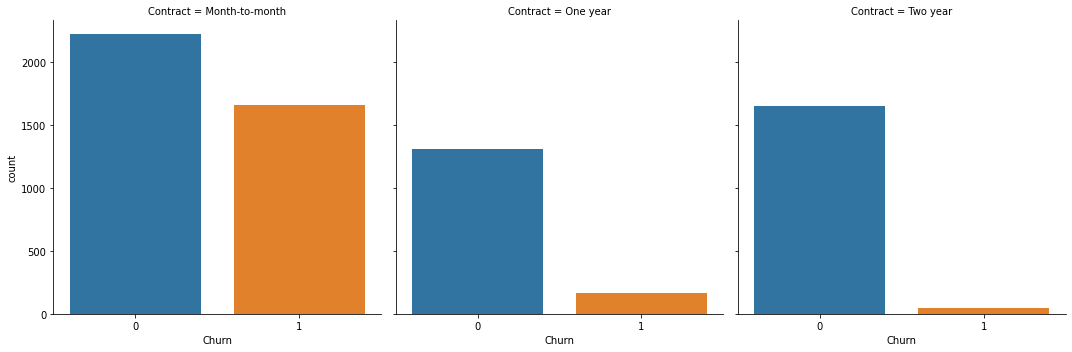

In [24]:
sns.countplot('Contract', data = df, palette = 'viridis')
sns.catplot('Churn', col = 'Contract', data =df, kind = 'count')
#we can observe that customers with month to month contract are more likely to churn

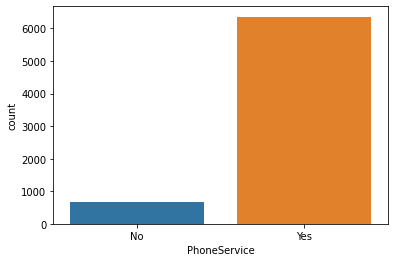

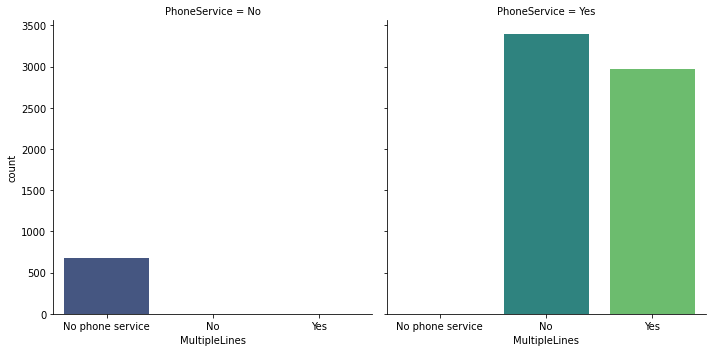

In [25]:
sns.countplot(x = 'PhoneService', data = df)
# we can observe that very less number of customers did not avail phone service
sns.catplot(x = 'MultipleLines', col = 'PhoneService', data = df, kind = 'count', palette = 'viridis')
# equal amount of customers who availed phone service opted for multiple lines
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


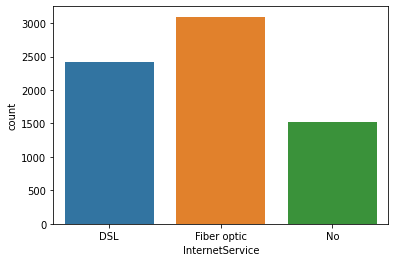

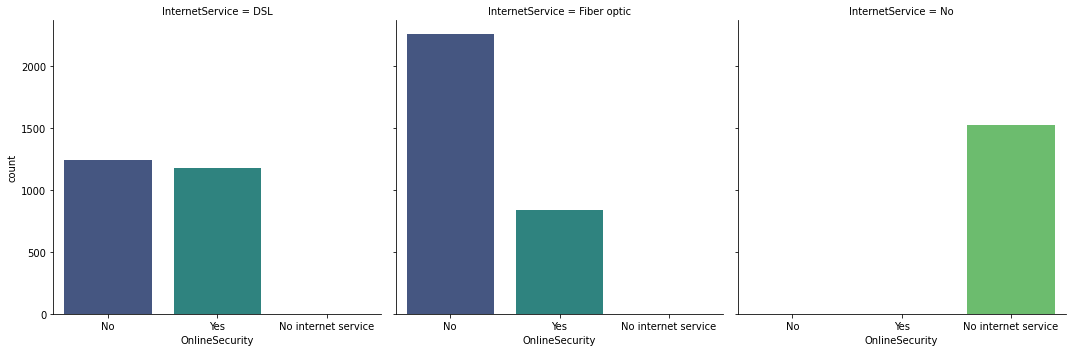

In [26]:
sns.countplot('InternetService', data = df)
#majority of customers opted for fiber optic internet service
sns.catplot(col = 'InternetService', x = 'OnlineSecurity', data = df, palette = 'viridis', kind = 'count')

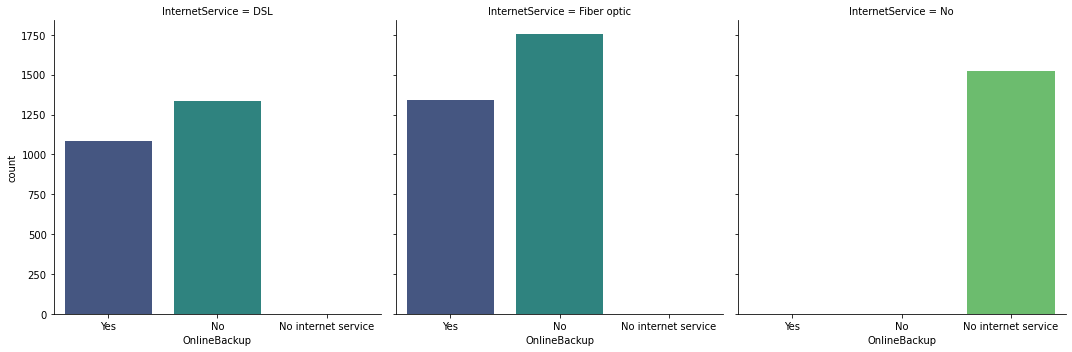

In [27]:
sns.catplot(col = 'InternetService', x = 'OnlineBackup', data = df, palette = 'viridis', kind = 'count')
#irrespective of internet service majority of customers did not opt for online backup

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


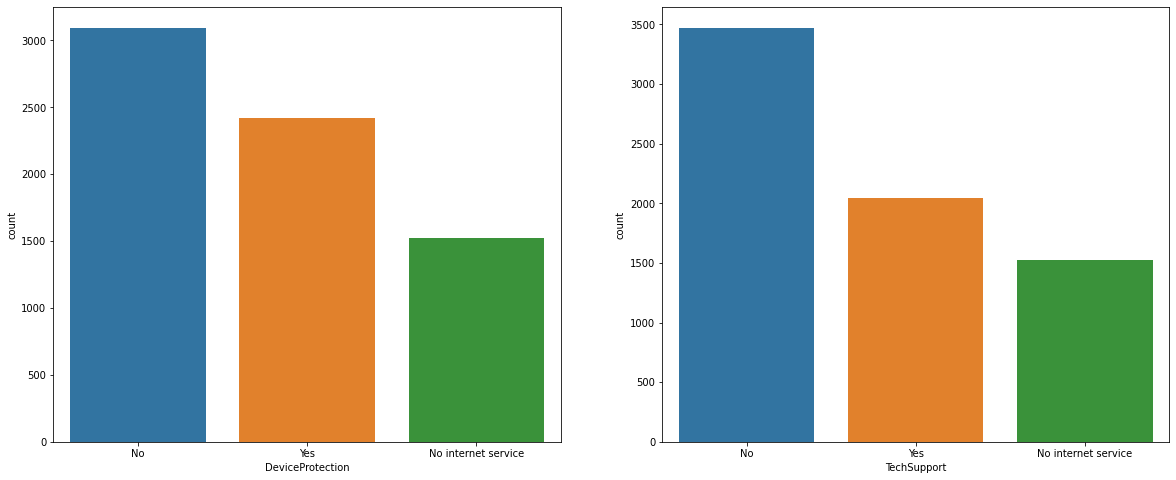

In [29]:
fid, (ax1, ax2) = plt.subplots(1, 2, figsize= (20, 8))
sns.countplot('DeviceProtection', data = df, ax = ax1)
sns.countplot('TechSupport', ax = ax2, data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


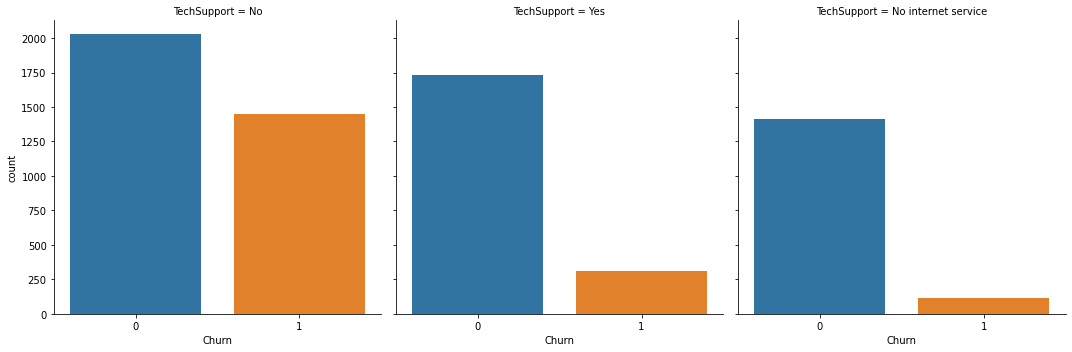

In [30]:
sns.catplot('Churn', col = 'TechSupport', data = df, kind = 'count')
#customer without tech support are more likely to churn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


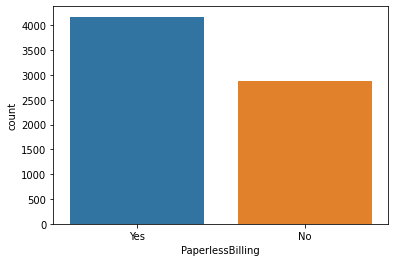

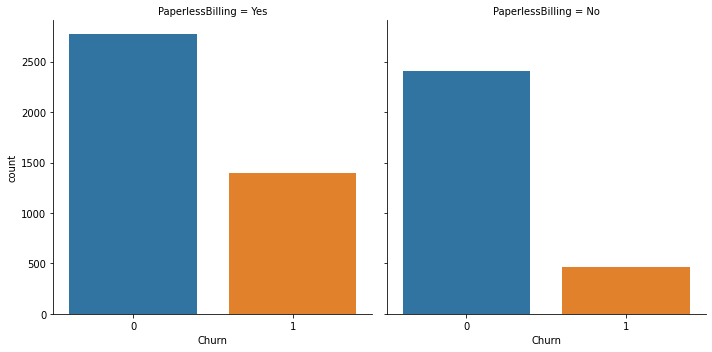

In [31]:
sns.countplot('PaperlessBilling', data = df)
sns.catplot(col = 'PaperlessBilling', x = 'Churn', data = df, kind = 'count')
#customers without paperless billing are less likely to churn

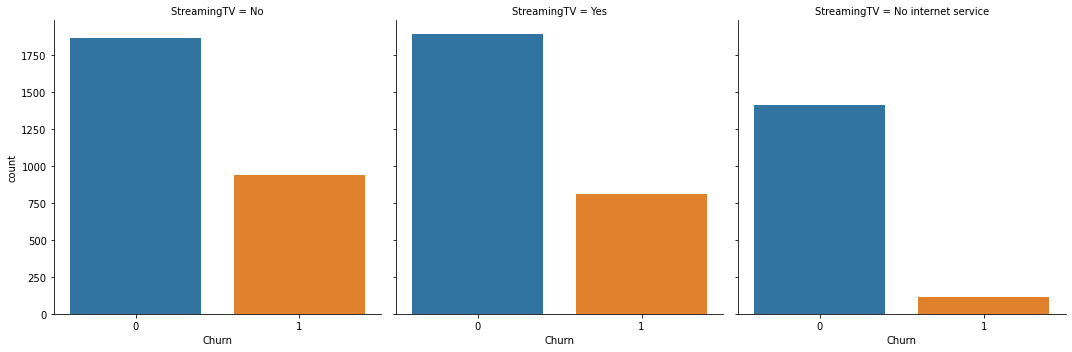

In [32]:
sns.catplot(col = 'StreamingTV', x = 'Churn', data = df, kind = 'count')
#no difference between churning of customers who opted for TV streaming or not

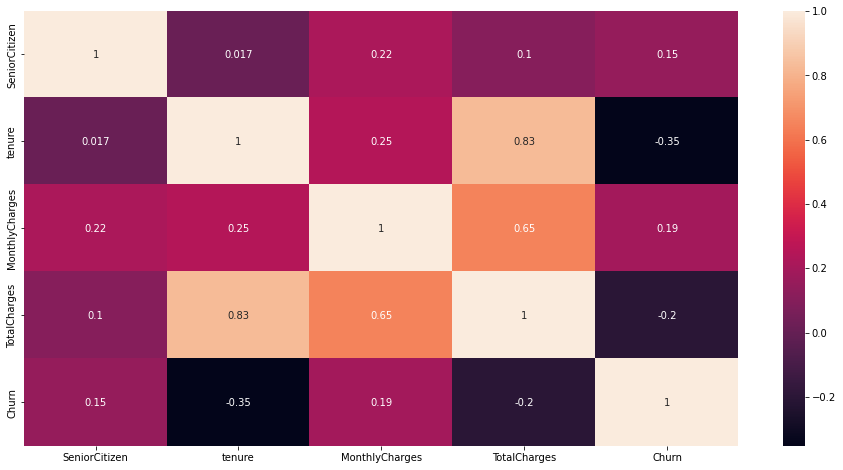

In [33]:
plt.figure(figsize = (16, 8))
corr = df.corr()
sns.heatmap(corr, annot = True)

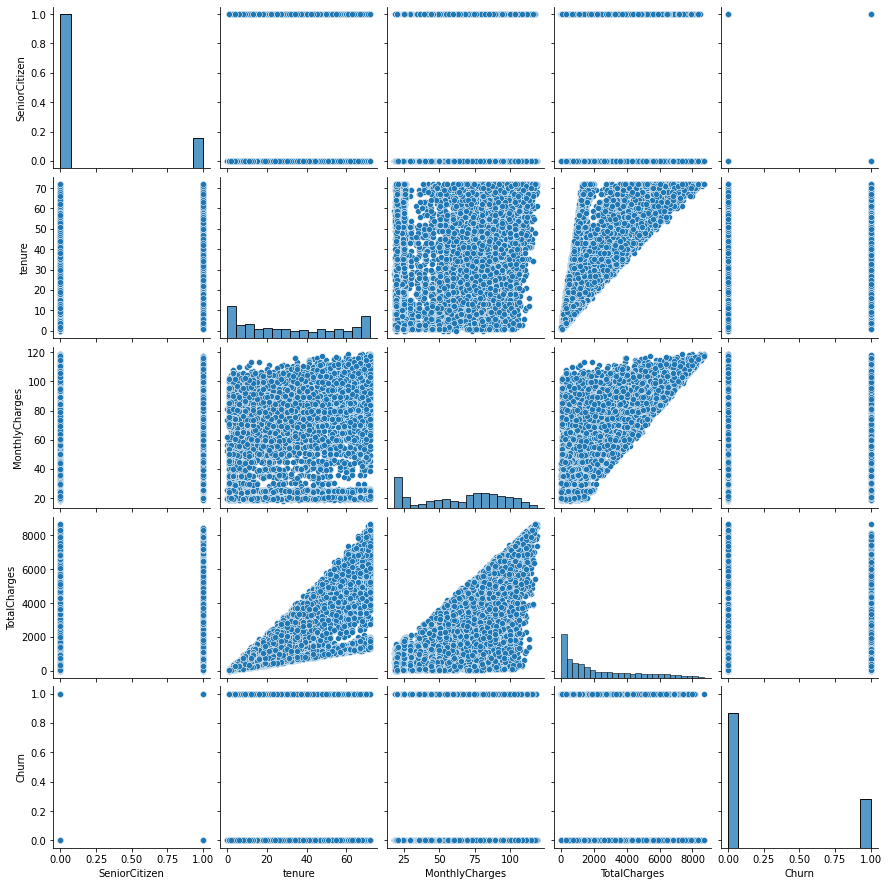

In [34]:
sns.pairplot(df)

In [35]:
df.isnull().sum()
df['TotalCharges'].describe()
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [36]:
#Creating dummy variables
df['Dependents'] = pd.get_dummies(df['Dependents'], drop_first=True)
df['Churn'] = pd.get_dummies(df['Churn'], drop_first = True)
df['Partner'] = pd.get_dummies(df['Partner'], drop_first=True)
df['gender'] = pd.get_dummies(df['gender'], drop_first = True)
df['SeniorCitizen'] = pd.get_dummies(df['SeniorCitizen'], drop_first=True)
df['PhoneService'] = pd.get_dummies(df['PhoneService'], drop_first = True)
df['PaperlessBilling'] = pd.get_dummies(df['PaperlessBilling'], drop_first = True)
s1 = ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, drop_first = True, columns = s1)

In [37]:
df.head()
df.drop('TotalCharges', inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   uint8  
 1   SeniorCitizen                          7043 non-null   uint8  
 2   Partner                                7043 non-null   uint8  
 3   Dependents                             7043 non-null   uint8  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   uint8  
 6   PaperlessBilling                       7043 non-null   uint8  
 7   MonthlyCharges                         7043 non-null   float64
 8   Churn                                  7043 non-null   uint8  
 9   MultipleLines_No phone service         7043 non-null   uint8  
 10  MultipleLines_Yes                      7043 non-null   uint8  
 11  Inte

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
X = df.drop(labels = 'Churn', axis = 1)
y = df['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [41]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [42]:
predictions = logistic_model.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.63      0.51      0.57       368

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, predictions)
accuracy_score(y_test, predictions)

0.794889992902768

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
dt_preds = dt.predict(X_test)
print(classification_report(y_test, dt_preds))
print(accuracy_score(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1041
           1       0.49      0.52      0.50       368

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.73      0.74      1409

0.7331440738112136


In [48]:
params = {'criterion' : ['gini', 'entropy'],'max_depth' : [2,3,4,5,6,7,8]}
grid = GridSearchCV(DecisionTreeClassifier(),params, verbose = 4)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.795 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.791 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.786 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.778 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.806 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=3;, score=0.795 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=3;, score=0.791 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=3;, score=0.786 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=3;, score=0.778 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=3;, score=0.806 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.795 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=4;

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             verbose=4)

In [49]:
dt1 = DecisionTreeClassifier(criterion =  'gini', max_depth =  5)
dt1.fit(X_train, y_train)
dt_preds1 = dt1.predict(X_test)
print(classification_report(y_test, dt_preds1))
print(accuracy_score(y_test, dt_preds1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.51      0.57       368

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409

0.794180269694819


In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
print(classification_report(y_test, rfc_preds))
print(accuracy_score(y_test, rfc_preds))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1041
           1       0.57      0.45      0.50       368

    accuracy                           0.77      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.77      0.76      1409

0.7679205110007097


In [51]:
feature_imp = pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

tenure                                   0.250408
MonthlyCharges                           0.223162
PaymentMethod_Electronic check           0.039918
InternetService_Fiber optic              0.038746
Contract_Two year                        0.035142
gender                                   0.033231
Contract_One year                        0.030646
PaperlessBilling                         0.029334
OnlineSecurity_Yes                       0.028484
Partner                                  0.028059
OnlineBackup_Yes                         0.026958
TechSupport_Yes                          0.026949
SeniorCitizen                            0.024498
MultipleLines_Yes                        0.024410
Dependents                               0.023678
DeviceProtection_Yes                     0.022837
StreamingMovies_Yes                      0.020722
StreamingTV_Yes                          0.020271
PaymentMethod_Credit card (automatic)    0.015989
PaymentMethod_Mailed check               0.014149


In [52]:
rfc_params = {'n_estimators' : [10, 30, 50, 100, 130, 150, 180, 200], 'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,3,4,5,6,7,8], 'max_features' : ['auto', 'log2']}
rfc_grid = GridSearchCV(RandomForestClassifier(), rfc_params, verbose = 4)
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.789 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.734 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=30;, score=0.770 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=30;, score=0.734 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, n_estimators=30;, score=0.734 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, max_features=a

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 30, 50, 100, 130, 150, 180, 200]},
             verbose=4)

In [53]:
# rfc_grid.best_estimator_
# rfc_grid.best_params_
rfc_best = RandomForestClassifier(n_estimators = 130, max_depth = 8)
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=130)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1041
           1       0.65      0.46      0.54       368

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

0.7955997161107168


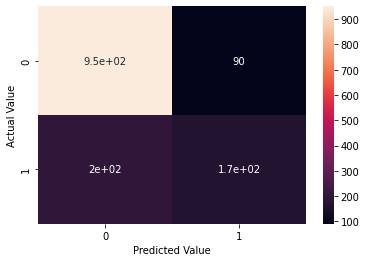

In [54]:
rfc_preds1 = rfc_best.predict(X_test)
print(classification_report(y_test, rfc_preds1))
print(accuracy_score(y_test, rfc_preds1))
sns.heatmap(confusion_matrix(y_test, rfc_preds1), annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()